# Title Basics and Title Ratings

In [1]:
library(ggplot2)
tb<-read.delim("title.basics.tsv", header=TRUE)
tr<-read.delim("title.ratings.tsv", header=TRUE)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [2]:
str(tb)

'data.frame':	7281233 obs. of  9 variables:
 $ tconst        : chr  "tt0000001" "tt0000002" "tt0000003" "tt0000004" ...
 $ titleType     : chr  "short" "short" "short" "short" ...
 $ primaryTitle  : chr  "Carmencita" "Le clown et ses chiens" "Pauvre Pierrot" "Un bon bock" ...
 $ originalTitle : chr  "Carmencita" "Le clown et ses chiens" "Pauvre Pierrot" "Un bon bock" ...
 $ isAdult       : chr  "0" "0" "0" "0" ...
 $ startYear     : chr  "1894" "1892" "1892" "1892" ...
 $ endYear       : chr  "\\N" "\\N" "\\N" "\\N" ...
 $ runtimeMinutes: chr  "1" "5" "4" "12" ...
 $ genres        : chr  "Documentary,Short" "Animation,Short" "Animation,Comedy,Romance" "Animation,Short" ...


In [3]:
str(tr)

'data.frame':	1086028 obs. of  3 variables:
 $ tconst       : chr  "tt0000001" "tt0000002" "tt0000003" "tt0000004" ...
 $ averageRating: num  5.6 6.1 6.5 6.2 6.2 5.3 5.5 5.4 5.9 6.9 ...
 $ numVotes     : int  1654 199 1366 121 2149 115 659 1821 156 6074 ...


In [4]:
unique(tb$titleType)

[1] "short"        "movie"        "tvShort"      "tvMovie"      "tvSeries"    
 [6] "tvEpisode"    "tvMiniSeries" "tvSpecial"    "video"        "videoGame"

In [8]:
tb_filtered=subset(tb,tb$titleType=='movie' | titleType=='short' | titleType=='tvMovie') #Filtered dataset

In [28]:
write.table(tb_filtered, file='filtered.title.basics.tsv', quote=FALSE, sep='\t') #Saving the filtered dataset

In [40]:
length(intersect(tr$tconst,tb_filtered$tconst)) #Both datasets have 423183 tconsts in common

[1] 423183

In [49]:
length(setdiff(tr$tconst,tb_filtered$tconst)) #There are 662845 tconsts in tr that are not in tb_filtered

[1] 662845

In [74]:
movies=subset(tb_filtered,tb_filtered$titleType=='movie')
shorts=subset(tb_filtered,tb_filtered$titleType=='short')
tvmovies=subset(tb_filtered,tb_filtered$titleType=='tvMovie')

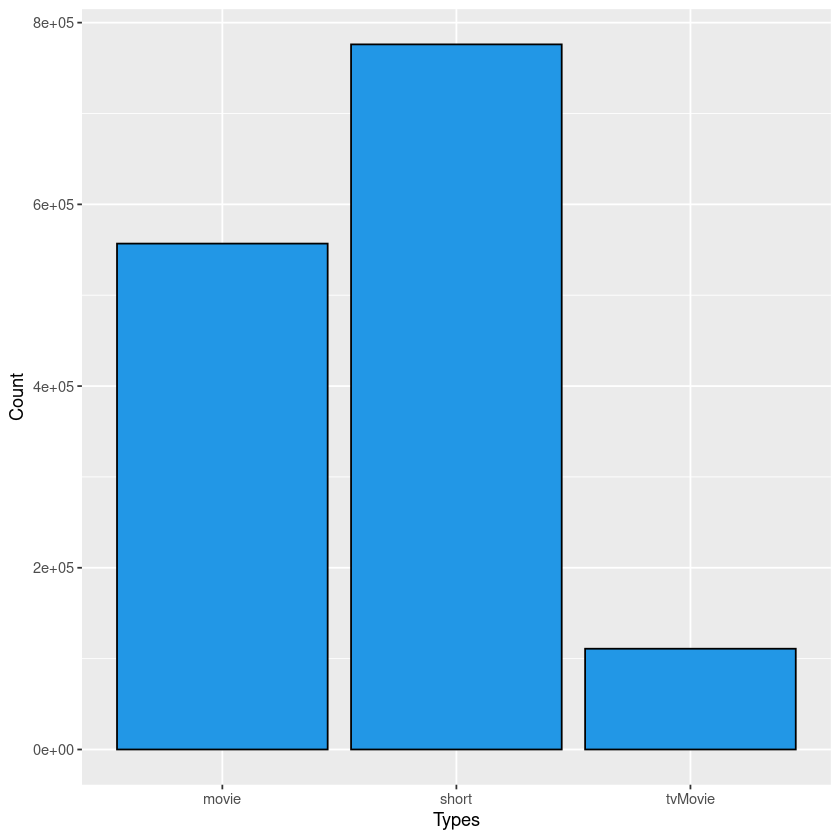

In [85]:
ggplot(tb_filtered,aes(x=titleType))+
    geom_bar(fill=4,color=1)+
    labs(x='Types',y='Count')